### EDA Lab 6
### ID: 202318009
### Name: ANMOL POONIA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from warnings import filterwarnings
filterwarnings('ignore')


### Read the UCI SECOM dataset

In [ ]:
df = pd.read_csv('uci-secom.csv')

In [ ]:
print('Info:  ')
df.info()
print('\nShape: ', df.shape)

Info:  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB

Shape:  (1567, 592)


In [ ]:
df.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


### Handling missing values

In [ ]:
percent_null_values = df.isnull().mean() * 100
null_cols = percent_null_values[percent_null_values > 50].index
print(f'\nNumber of columns with more than 50 % of null values: {len(null_cols)}, which are \n\n{null_cols} ')

df = df.drop(columns = null_cols, axis=1)
print(f'\nShape of Dataframe after dropping columns: {df.shape}')


Number of columns with more than 50 % of null values: 28, which are 

Index(['72', '73', '85', '109', '110', '111', '157', '158', '220', '244',
       '245', '246', '292', '293', '345', '346', '358', '382', '383', '384',
       '492', '516', '517', '518', '578', '579', '580', '581'],
      dtype='object') 

Shape of Dataframe after dropping columns: (1567, 564)


In [ ]:

df = df.fillna(df.median())
print(f'\nNumber of null columns after median imputation: {(df.isnull().any()).sum()}')

X, y = df.drop(columns = ['Time']), df['Pass/Fail']


Number of null columns after median imputation: 0


### Visualization

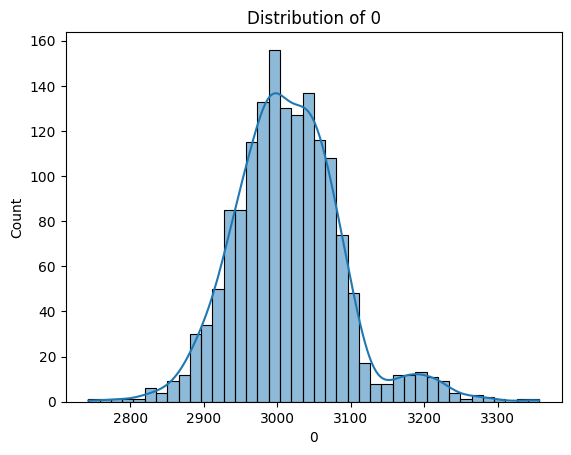

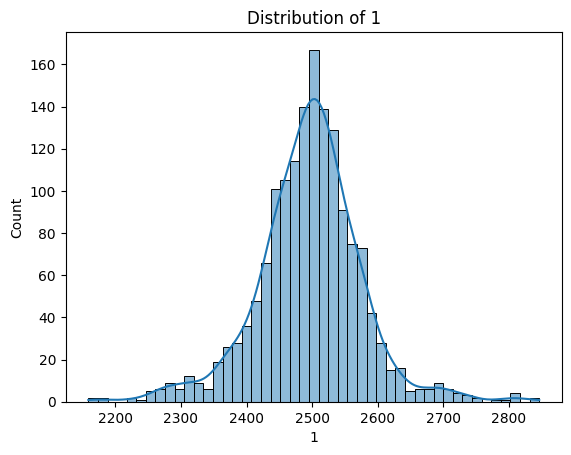

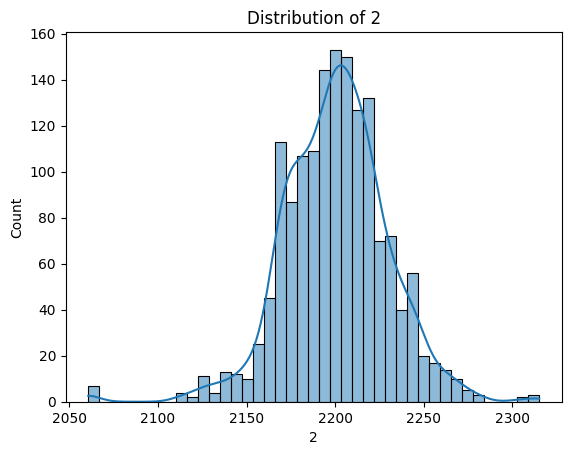

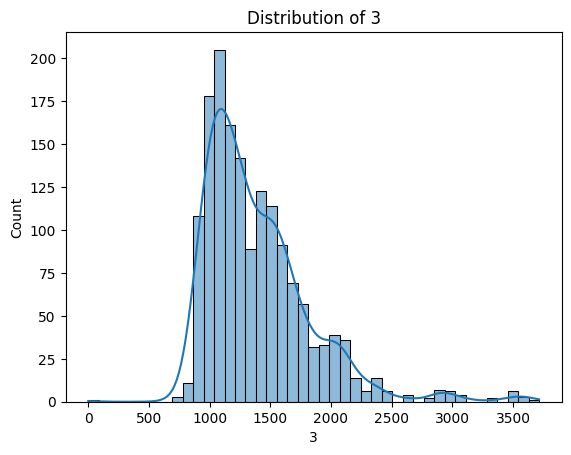

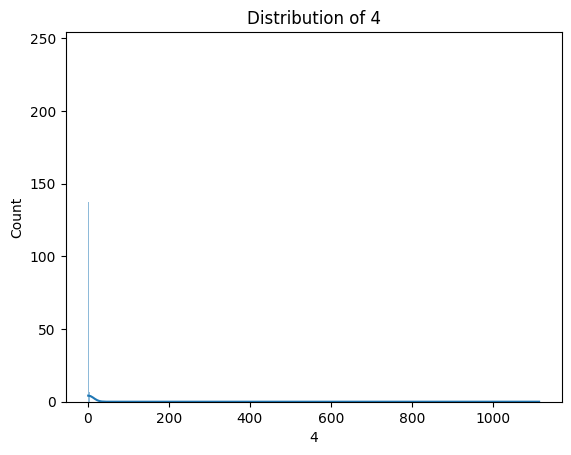

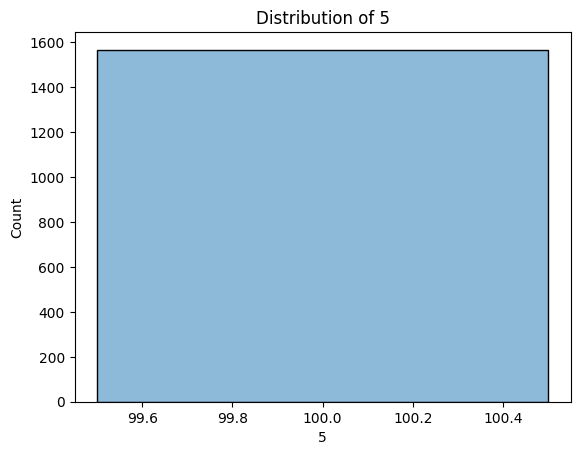

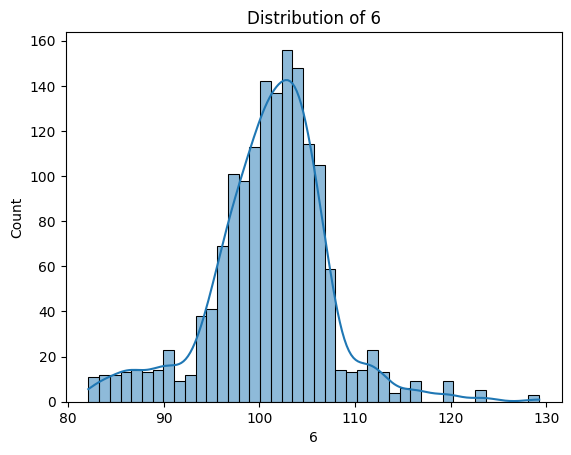

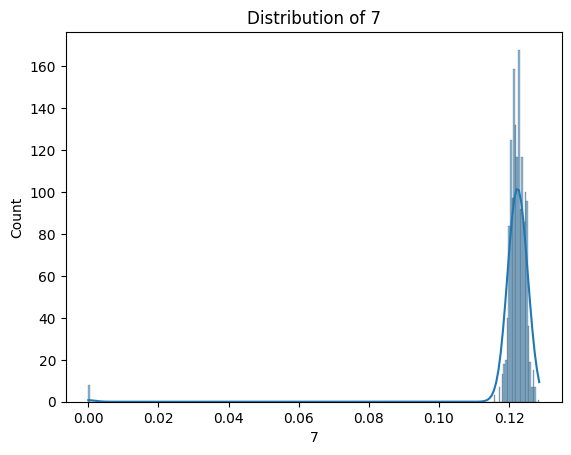

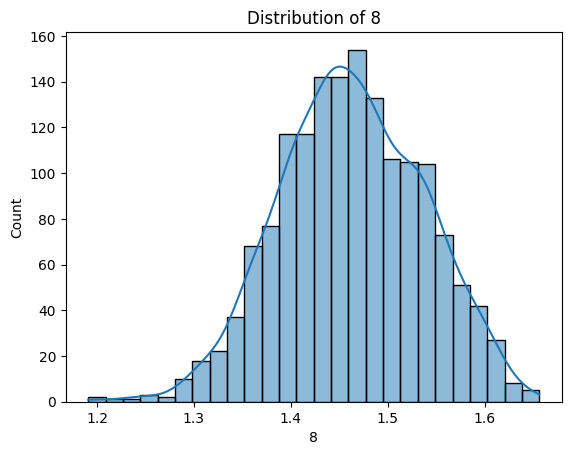

In [ ]:
for i in range(1, 10):
    sns.histplot(data = df, x = df.columns[i], kde=True)
    plt.title(f'Distribution of {df.columns[i]}')
    plt.show()

### Feature Selection Methods

#### 1. Select K Best Features

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE, f_classif

# Method 1: Univariate Feature Selection

selector = SelectKBest(score_func=f_classif, k=6)
X_train_univariate = selector.fit_transform(X, y)
selected_features_univariate = X.columns[selector.get_support()]

df.loc[:, selected_features_univariate]

,59,103,348,431,510,Pass/Fail
0,-1.7264,-0.0042,0.0215,33.1562,64.6707,-1
1,0.8073,-0.0045,0.0142,2.2655,141.4365,-1
2,23.8245,-0.0026,0.0105,29.1663,240.7767,1
3,24.3791,-0.0059,0.0407,13.4051,113.5593,-1
4,-12.2945,-0.0045,0.0246,10.7390,148.0663,-1
...,...,...,...,...,...,...
1562,2.8182,-0.0094,0.0226,12.8067,53.1915,-1
1563,-3.3555,-0.0116,0.0226,4.1273,29.4372,-1
1564,1.1664,-0.0142,0.0226,20.0222,54.8330,-1
1565,4.4682,-0.0087,0.0226,9.4153,78.4993,-1


#### 2. Random Forest Features

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)
importance_scores = model.feature_importances_
selected_features_importance = X.columns[np.argsort(importance_scores)[-6:]]

df.loc[:, selected_features_importance]

,437,40,103,64,59,Pass/Fail
0,3.1136,61.29,-0.0042,21.7264,-1.7264,-1
1,3.2153,78.25,-0.0045,19.1927,0.8073,-1
2,3.1281,14.37,-0.0026,16.1755,23.8245,1
3,2.7013,76.90,-0.0059,15.6209,24.3791,-1
4,6.2069,76.39,-0.0045,32.2945,-12.2945,-1
...,...,...,...,...,...,...
1562,8.2930,81.21,-0.0094,17.1818,2.8182,-1
1563,3.7065,79.43,-0.0116,23.3555,-3.3555,-1
1564,4.4902,82.03,-0.0142,18.8336,1.1664,-1
1565,3.1201,81.13,-0.0087,15.5318,4.4682,-1


#### 3. Select Percentile Features

In [ ]:
from sklearn.feature_selection import SelectPercentile, f_classif

sel_pct = SelectPercentile(f_classif , percentile=0.8)
sel_pct_df = sel_pct.fit_transform(X, y)

sel_features_pct = sel_pct.get_support(indices=True)
sel_features_pct

df.iloc[:, sel_features_pct]

,58,102,347,509,589
0,4.7057,0.1350,0.0,0.0,71.9005
1,4.6820,-0.0752,0.0,0.0,208.2045
2,4.5873,0.0134,0.0,0.0,82.8602
3,4.5873,-0.0699,0.0,0.0,73.8432
4,4.6414,0.0696,0.0,0.0,73.8432
...,...,...,...,...,...
1562,4.4941,-0.0988,0.0,0.0,203.1720
1563,4.5305,0.0855,0.0,0.0,203.1720
1564,4.6118,0.0022,0.0,0.0,43.5231
1565,4.5509,-0.1165,0.0,0.0,93.4941


### Feature Transformation Techniques

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

def apply_transformations(X, selected_features):

    # Method 1: Principal Component Analysis (PCA)
    pca = PCA(n_components=5)
    X_pca = pca.fit_transform(X[selected_features])

    # Method 2: Polynomial Features
    poly = PolynomialFeatures(degree=2, include_bias=False)
    X_poly = poly.fit_transform(X[selected_features])

    # Method 3: Feature Scaling (MinMaxScaler)
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X[selected_features])

    return X_pca, X_poly, X_scaled

#### Feature Transformation on Select K Best

In [ ]:
print(f'\nFor K best features i.e. 5 features: \n')

pca_result, poly_result, scaled_result = apply_transformations(X, selected_features_univariate)

print(f'\nPCA Transformation: \n\n{pca_result}')
print(f'\n\nPolynomial Transformation: \n\n{poly_result}')
print(f'\n\nStandard Scaling: \n\n{scaled_result}')


For K best features i.e. 5 features: 


PCA Transformation: 

[[ 1.33882348e+01  3.18864879e+00 -5.36347632e+00 -1.26280388e-01
  -2.25796414e-03]
 [ 5.52360824e+01 -6.82323017e+01 -6.56504467e+00 -1.94974420e-01
  -1.05971558e-02]
 [ 1.51374368e+02 -1.08144586e+02  1.03906597e+01  1.49716933e+00
  -2.40442208e-02]
 ...
 [-2.24820384e+00 -1.24444534e+00 -1.68924592e+00 -1.16688185e-01
  -1.54871369e-03]
 [ 1.01298035e+01 -2.41703400e+01  4.76147125e-01 -1.53276011e-01
  -2.10236640e-03]
 [ 9.11480661e+00 -2.09407345e+01 -2.00410830e+00 -1.35359666e-01
  -1.74423941e-03]]


Polynomial Transformation: 

[[-1.72640000e+00 -4.20000000e-03  2.15000000e-02 ...  4.18229944e+03
  -6.46707000e+01  1.00000000e+00]
 [ 8.07300000e-01 -4.50000000e-03  1.42000000e-02 ...  2.00042835e+04
  -1.41436500e+02  1.00000000e+00]
 [ 2.38245000e+01 -2.60000000e-03  1.05000000e-02 ...  5.79734193e+04
   2.40776700e+02  1.00000000e+00]
 ...
 [ 1.16640000e+00 -1.42000000e-02  2.26000000e-02 ...  3.00665789e+03


#### Visualization for Select K Best Features

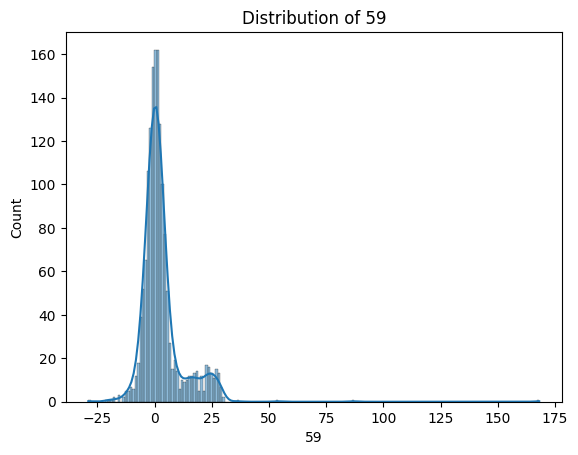

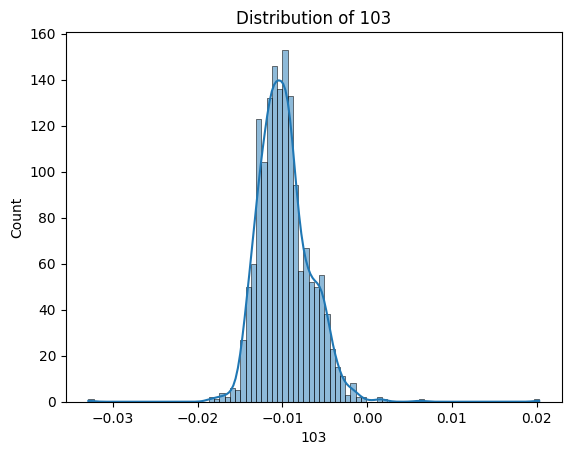

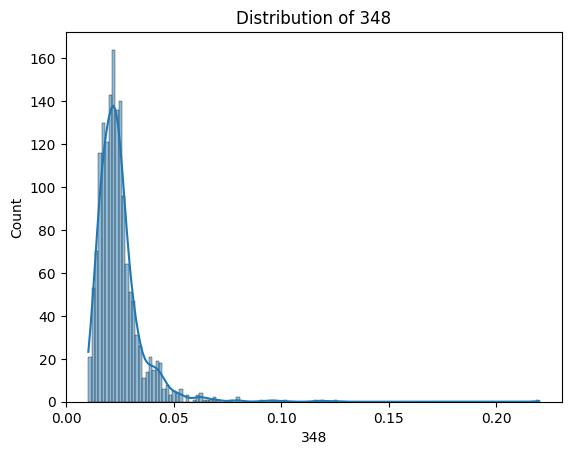

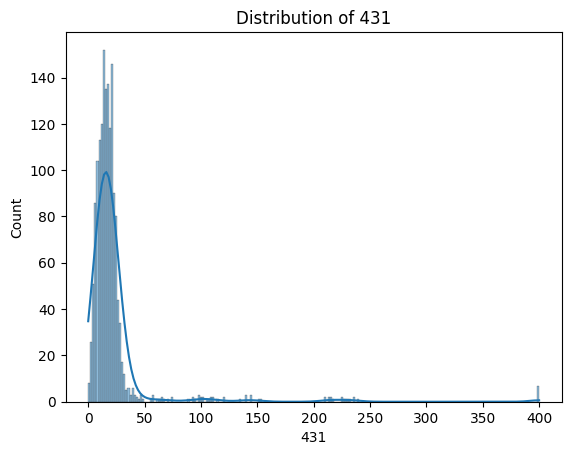

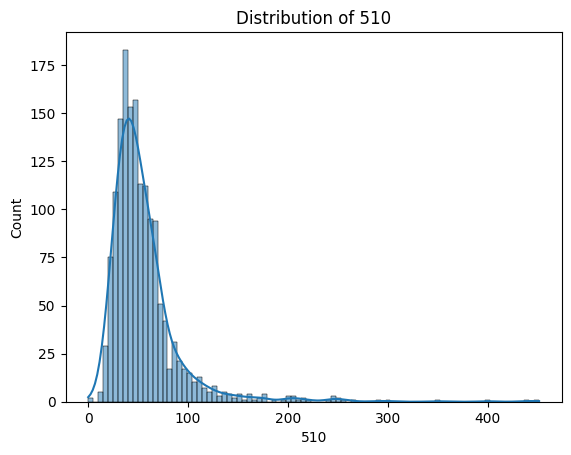

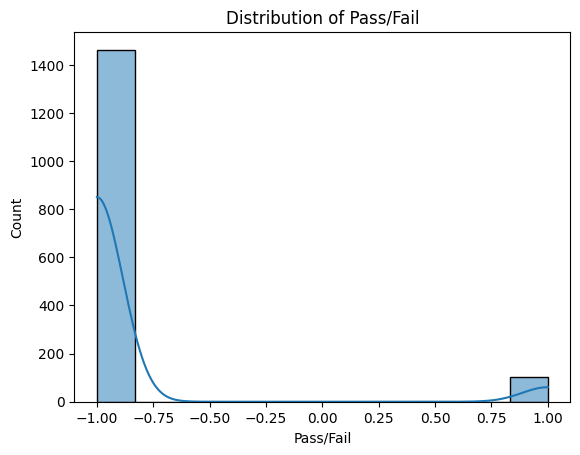

In [ ]:
for i in selected_features_univariate:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

#### Feature Transformation on Random Forest Feature Selection

In [ ]:
print(f'\nFor Random Forest Feature Selection: \n')

pca_result, poly_result, scaled_result = apply_transformations(X, selected_features_importance)

print(f'\nPCA Transformation: \n\n{pca_result}')
print(f'\n\nPolynomial Transformation: \n\n{poly_result}')
print(f'\n\nStandard Scaling: \n\n{scaled_result}')


For Random Forest Feature Selection: 


PCA Transformation: 

[[ 6.48339845e+00 -5.21864276e+00  2.82804793e-02 -8.54877336e-01
   8.71376329e-02]
 [-1.02924607e+01 -1.20035502e+00 -1.67790470e+00 -7.93890362e-01
   6.86994931e-02]
 [ 5.48526103e+01  1.81540949e+01 -2.78919743e-01 -8.45942735e-01
  -1.69825383e+00]
 ...
 [-1.40468258e+01 -5.41866767e-01 -1.88465291e+00  4.70846589e-01
   9.12688208e-02]
 [-1.29444324e+01  3.34058033e+00 -4.40664990e+00 -8.85683229e-01
   5.08744762e-02]
 [-1.24287035e+01  2.14267832e-01 -2.42337835e+00  1.32473745e+00
   1.07093285e-01]]


Polynomial Transformation: 

[[ 3.11360000e+00  6.12900000e+01 -4.20000000e-03 ...  2.98045696e+00
   1.72640000e+00  1.00000000e+00]
 [ 3.21530000e+00  7.82500000e+01 -4.50000000e-03 ...  6.51733290e-01
  -8.07300000e-01  1.00000000e+00]
 [ 3.12810000e+00  1.43700000e+01 -2.60000000e-03 ...  5.67606800e+02
   2.38245000e+01  1.00000000e+00]
 ...
 [ 4.49020000e+00  8.20300000e+01 -1.42000000e-02 ...  1.36048896e+00


#### Visualization for Random Forest Features

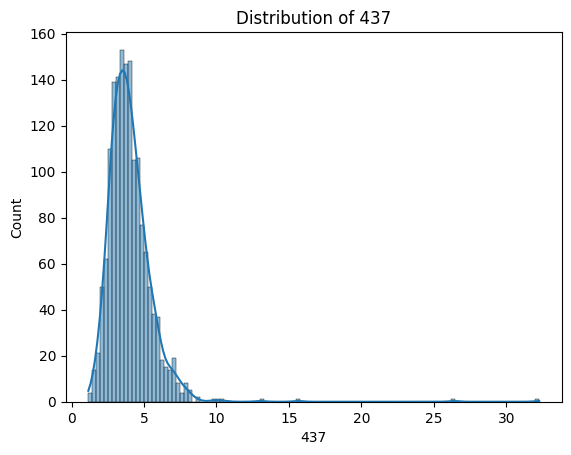

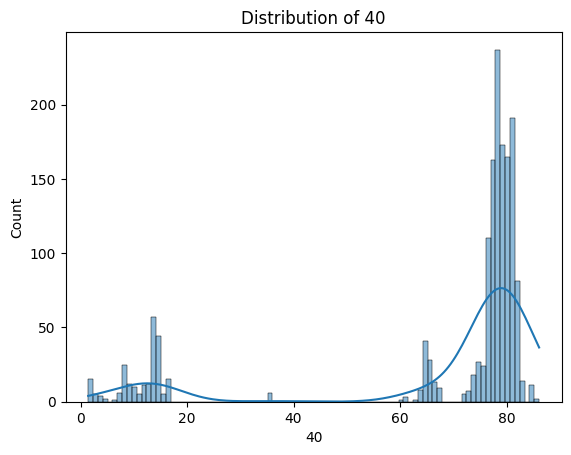

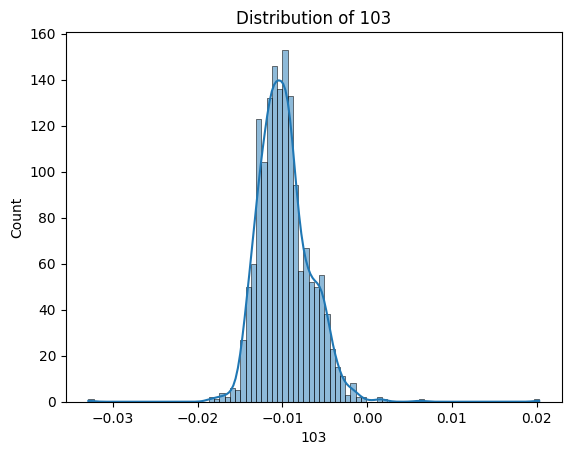

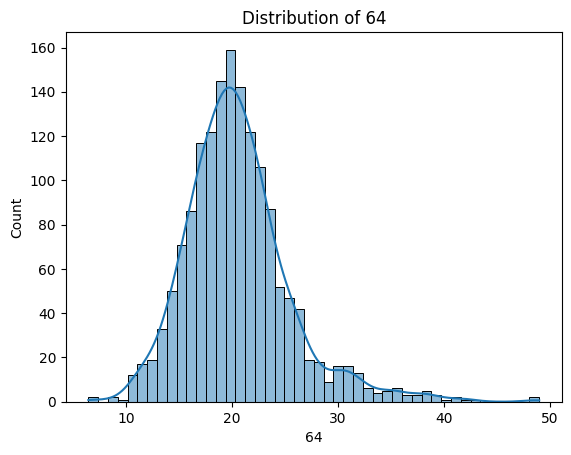

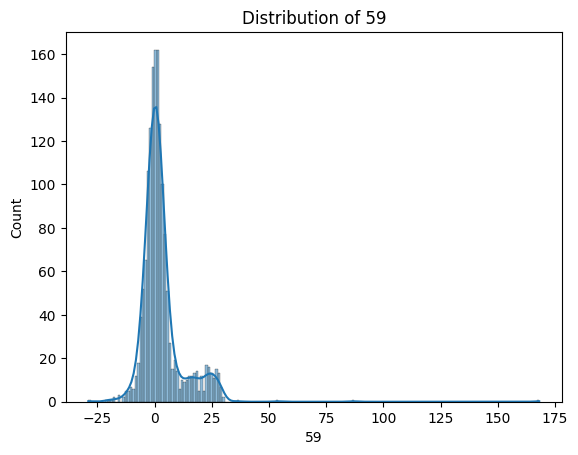

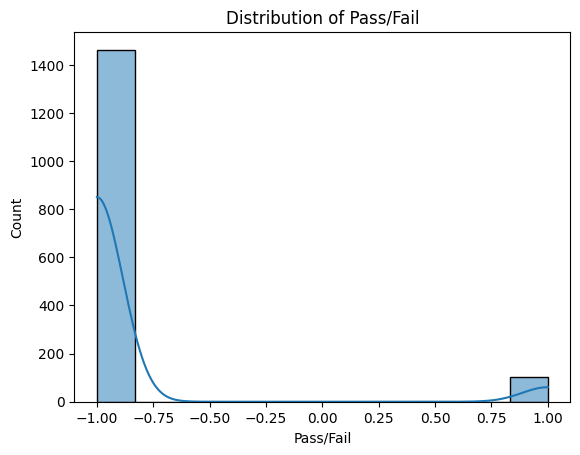

In [ ]:
for i in selected_features_importance:
    sns.histplot(data = df, x = i, kde=True)
    plt.title(f'Distribution of {i}')
    plt.show()

#### Feature Transformation on Percentile Feature Selection

In [ ]:

print(f'\nFor Percentile Feature Selection: \n')

pca_result, poly_result, scaled_result = apply_transformations(X, df.columns[sel_features_pct])

print(f'\nPCA Transformation: \n\n{pca_result}')
print(f'\n\nPolynomial Transformation: \n\n{poly_result}')
print(f'\n\nStandard Scaling: \n\n{scaled_result}')


For Percentile Feature Selection: 


PCA Transformation: 

[[-2.77518485e+01  3.18474533e-03 -1.09047098e-01 -1.36189139e-01
   0.00000000e+00]
 [ 1.08552140e+02 -5.81829588e-02 -9.09756116e-02  7.27846110e-02
  -0.00000000e+00]
 [-1.67921473e+01 -1.28865559e-03  6.36656696e-03 -1.19363320e-02
  -0.00000000e+00]
 ...
 [-5.61292433e+01  1.62846246e-02 -1.82193084e-02 -8.24571089e-04
  -0.00000000e+00]
 [-6.15824650e+00 -6.00299925e-03  3.96078015e-02  1.18660520e-01
  -0.00000000e+00]
 [ 3.81320489e+01 -2.59062461e-02  4.26208069e-02  1.09371824e-01
  -0.00000000e+00]]


Polynomial Transformation: 

[[ 4.70570000e+00  1.35000000e-01  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  5.16968190e+03]
 [ 4.68200000e+00 -7.52000000e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  4.33491138e+04]
 [ 4.58730000e+00  1.34000000e-02  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  6.86581274e+03]
 ...
 [ 4.61180000e+00  2.20000000e-03  0.00000000e+00 ...  0.00000000e+00
   

#### Visualization for k Perecentile Features

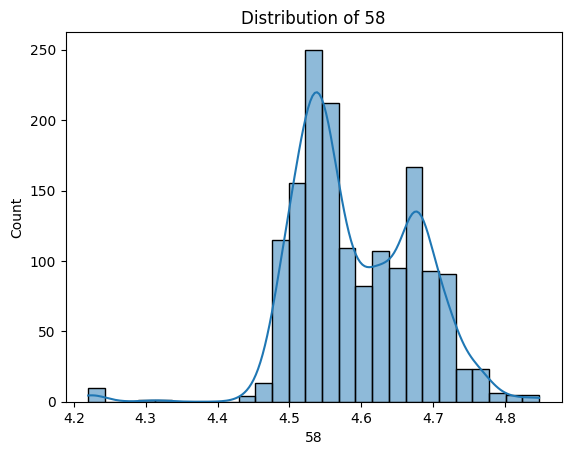

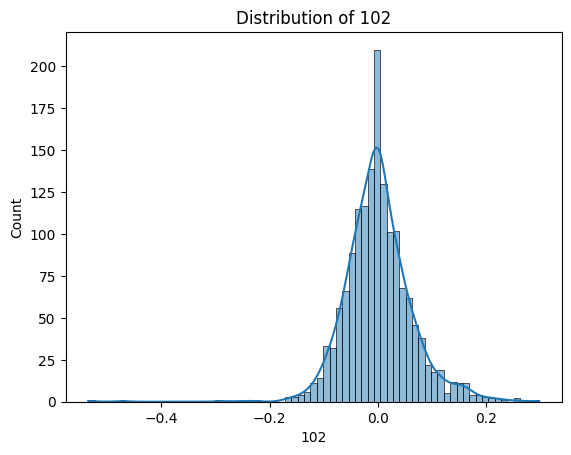

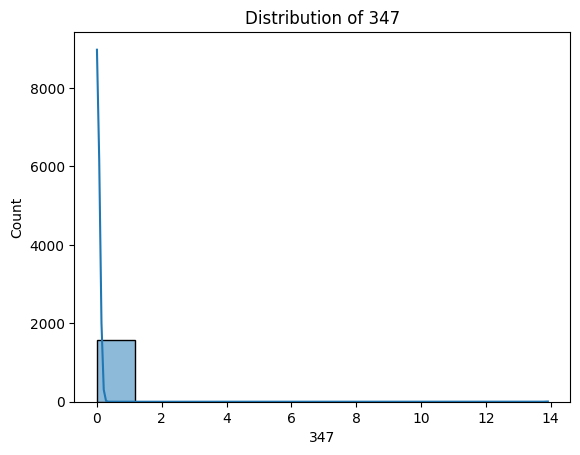

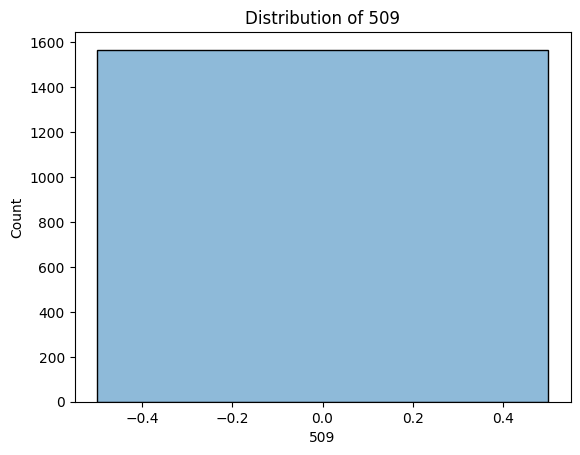

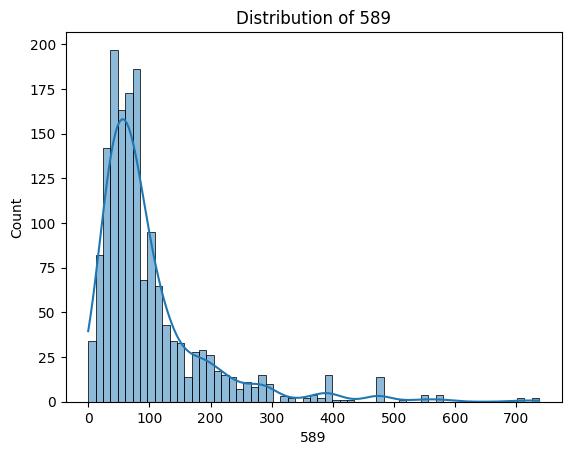

In [ ]:
for i in sel_features_pct:
    sns.histplot(data = df, x = df.columns[i], kde=True)
    plt.title(f'Distribution of {df.columns[i]}')
    plt.show()

### Classification Model: LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

def get_accuracy(X, y):

  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

  log_reg = LogisticRegression()
  log_reg.fit(X_train, y_train)

  y_pred = log_reg.predict(X_test)

  print(f'\nReport:  {classification_report( y_test, y_pred)}' )




#### Model Performance for K Best Features

In [ ]:
X = df.loc[:, selected_features_univariate]

X = X.drop(columns = 'Pass/Fail')
y = df['Pass/Fail']

print(f'\nFor K best features i.e. 5 features: \n')
get_accuracy(X, y)


For K best features i.e. 5 features: 


Report:                precision    recall  f1-score   support

          -1       0.92      0.99      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.88       314



#### Model Performance for Random Forest Features

In [ ]:
X = df.loc[:, selected_features_importance]

X = X.drop(columns = 'Pass/Fail')
y = df['Pass/Fail']

print(f'\nFor Random Forest Feature Selection: \n')
get_accuracy(X, y)


For Random Forest Feature Selection: 


Report:                precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314



#### Model Performance for K Percentile Features

In [ ]:

X = df.iloc[:, sel_features_pct]

y = df['Pass/Fail']

print(f'\nFor Percentile Feature Selection: \n')
get_accuracy(X, y)



For Percentile Feature Selection: 


Report:                precision    recall  f1-score   support

          -1       0.92      1.00      0.96       290
           1       0.00      0.00      0.00        24

    accuracy                           0.92       314
   macro avg       0.46      0.50      0.48       314
weighted avg       0.85      0.92      0.89       314

